In [2]:
import pandas as pd

nodes_df = pd.read_csv("C:\\Users\\YuxinLi\\Downloads\\FoodwebNodelist.csv")
edges_df = pd.read_csv("C:\\Users\\YuxinLi\\Downloads\\FoodwebEdgelist.csv")

print(nodes_df.head())
print(edges_df.head())

                          Id  Label   kingdom    phylum     class      order  \
0              Canis latrans    NaN  Animalia  Chordata  Mammalia  Carnivora   
1  Ammospermophilus leucurus    NaN  Animalia  Chordata  Mammalia   Rodentia   
2            Vulpes macrotis    NaN  Animalia  Chordata  Mammalia  Carnivora   
3        Bassariscus astutus    NaN  Animalia  Chordata  Mammalia  Carnivora   
4                 Lynx rufus    NaN  Animalia  Chordata  Mammalia  Carnivora   

        family             genus                    species   category  \
0      Canidae             Canis              Canis latrans  vert.endo   
1    Sciuridae  Ammospermophilus  Ammospermophilus leucurus  vert.endo   
2      Canidae            Vulpes            Vulpes macrotis  vert.endo   
3  Procyonidae       Bassariscus        Bassariscus astutus  vert.endo   
4      Felidae              Lynx                 Lynx rufus  vert.endo   

    taxon                  aggregate  
0  Mammal              Canis latran

In [3]:
import networkx as nx

# Create an undirected graph from the edge list DataFrame
G = nx.from_pandas_edgelist(edges_df, source='Source', target='Target')

print(G)

Graph with 300 nodes and 4059 edges


In [4]:
# Calculate the global clustering coefficient (transitivity) of the graph
clustering_coeff = nx.transitivity(G)
print(f"Global clustering coefficient: {clustering_coeff:.4f}")

Global clustering coefficient: 0.1394


In [6]:
n = G.number_of_nodes()
m = G.number_of_edges()

er_transitivities = []
for _ in range(100):
    er = nx.gnm_random_graph(n, m)
    trans = nx.transitivity(er)
    er_transitivities.append(trans)

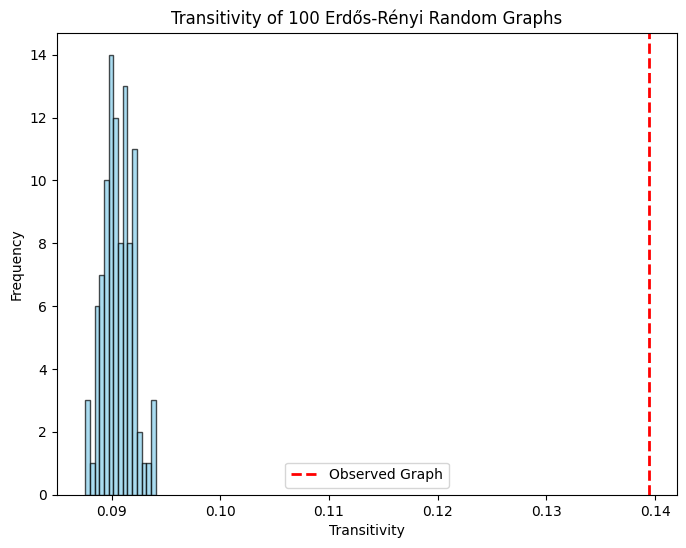

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(er_transitivities, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(clustering_coeff, color='red', linestyle='dashed', linewidth=2, label='Observed Graph')
plt.xlabel('Transitivity')
plt.ylabel('Frequency')
plt.title('Transitivity of 100 Erdős-Rényi Random Graphs')
plt.legend()
plt.show()

In [8]:
# Load the edge-weighted graph
G_brain = nx.read_weighted_edgelist("C:\\Users\\YuxinLi\\Downloads\\brain_network.txt")

# Create a list of the degrees of all nodes
degrees = [deg for node, deg in G_brain.degree()]
print("Degrees of all nodes:", degrees)

# Calculate and print the unweighted global clustering coefficient
clustering_coeff = nx.transitivity(G_brain)
print(f"Unweighted global clustering coefficient: {clustering_coeff:.4f}")

Degrees of all nodes: [13, 19, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 22, 9, 2, 2, 2, 2, 2, 2, 2, 2, 35, 16, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Unweighted global clustering coefficient: 0.2114


In [9]:
# Generate 100 configuration model graphs and calculate their clustering coefficients
config_clustering = []

for _ in range(100):
    # Create configuration model
    config = nx.configuration_model(degrees)
    # Convert to simple graph (remove parallel edges and self-loops)
    simple_config = nx.Graph(config)
    simple_config.remove_edges_from(nx.selfloop_edges(simple_config))
    # Calculate global clustering coefficient
    coeff = nx.transitivity(simple_config)
    config_clustering.append(coeff)

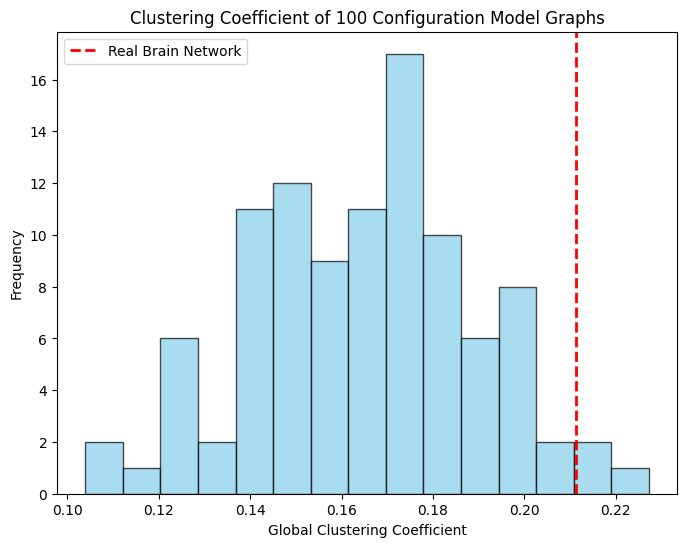

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(config_clustering, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(clustering_coeff, color='red', linestyle='dashed', linewidth=2, label='Real Brain Network')
plt.xlabel('Global Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient of 100 Configuration Model Graphs')
plt.legend()
plt.show()

In [11]:
import numpy as np

# Calculate the sum of weights (strength) for each node
strength = dict(G_brain.degree(weight='weight'))

# Calculate the total strength of the graph (sum of all edge weights)
total_strength = sum(strength.values())

# Get the list of nodes and create an index mapping
nodes = list(G_brain.nodes())
node_index = {node: i for i, node in enumerate(nodes)}

# Create an empty matrix to store the J-values
J = np.zeros((len(nodes), len(nodes)))

# Nested loop through every possible pair of nodes
for i, u in enumerate(nodes):
    for j, v in enumerate(nodes):
        # Get the actual edge weight (0 if no edge exists)
        actual_weight = G_brain[u][v]['weight'] if G_brain.has_edge(u, v) else 0.0
        # Calculate the expected weight
        expected_weight = (strength[u] * strength[v]) / (2.0 * total_strength)
        # Compute J-value
        J[i, j] = actual_weight - expected_weight

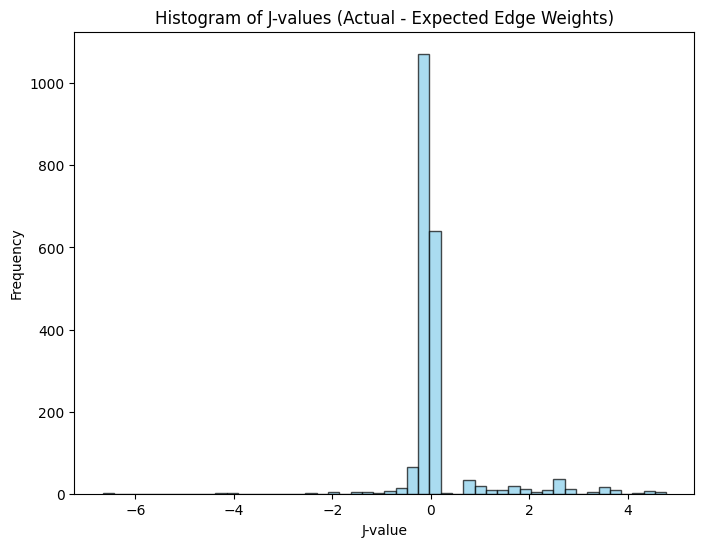

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(J.flatten(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('J-value')
plt.ylabel('Frequency')
plt.title('Histogram of J-values (Actual - Expected Edge Weights)')
plt.show()

In [13]:
# 1. Erdős-Rényi random graph
G_random = nx.erdos_renyi_graph(1000, 0.01)

# 2. Community-based graph (stochastic block model)
sizes = [200] * 5  # 5 communities of 200 nodes each
p_in = 0.0480      # Probability within communities
p_out = 0.000548   # Probability between communities

# Create the probability matrix
probs = [[p_in if i == j else p_out for j in range(5)] for i in range(5)]

G_community = nx.stochastic_block_model(sizes, probs)

# Print number of nodes and edges for both graphs
print(f"G_random: {G_random.number_of_nodes()} nodes, {G_random.number_of_edges()} edges")
print(f"G_community: {G_community.number_of_nodes()} nodes, {G_community.number_of_edges()} edges")

G_random: 1000 nodes, 4974 edges
G_community: 1000 nodes, 4944 edges


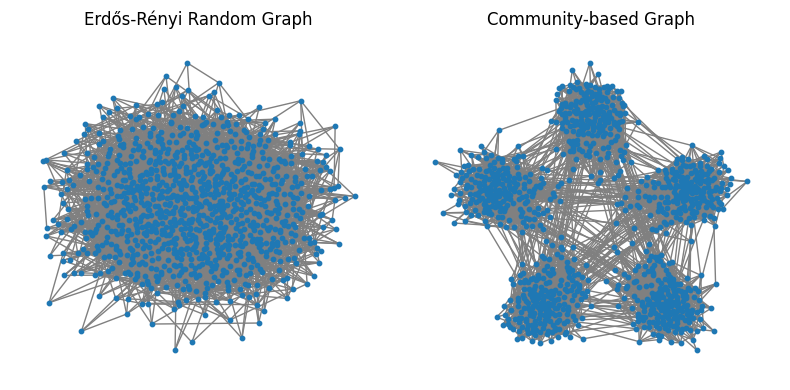

In [14]:
# Visualize the Erdős-Rényi random graph
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
pos_random = nx.spring_layout(G_random, seed=42)
nx.draw(G_random, pos_random, node_size=10, edge_color='gray')
plt.title("Erdős-Rényi Random Graph")

# Visualize the community-based graph
plt.subplot(1, 2, 2)
pos_community = nx.spring_layout(G_community, seed=42)
nx.draw(G_community, pos_community, node_size=10, edge_color='gray')
plt.title("Community-based Graph")

plt.tight_layout()
plt.show()

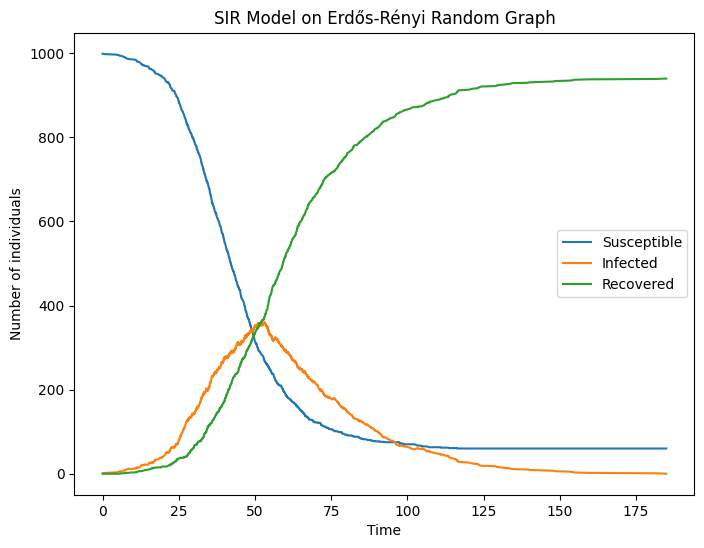

In [16]:
import EoN

# Set parameters
tau = 0.02
gamma = 0.05
initial_infecteds = [0]

# Run the fast_SIR simulation
t, S, I, R = EoN.fast_SIR(G_random, tau, gamma, initial_infecteds=initial_infecteds, tmax=200)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.title('SIR Model on Erdős-Rényi Random Graph')
plt.legend()
plt.show()

In [17]:
beta = 0.05
gamma = 0.1
initial_infecteds = [0]
n_sim = 100

# Store (peak_time, peak_height) for each simulation
random_peaks = []
community_peaks = []

for _ in range(n_sim):
    t, S, I, R = EoN.fast_SIR(G_random, beta, gamma, initial_infecteds=initial_infecteds, tmax=200)
    peak_idx = np.argmax(I)
    random_peaks.append((t[peak_idx], I[peak_idx]))

for _ in range(n_sim):
    t, S, I, R = EoN.fast_SIR(G_community, beta, gamma, initial_infecteds=initial_infecteds, tmax=200)
    peak_idx = np.argmax(I)
    community_peaks.append((t[peak_idx], I[peak_idx]))

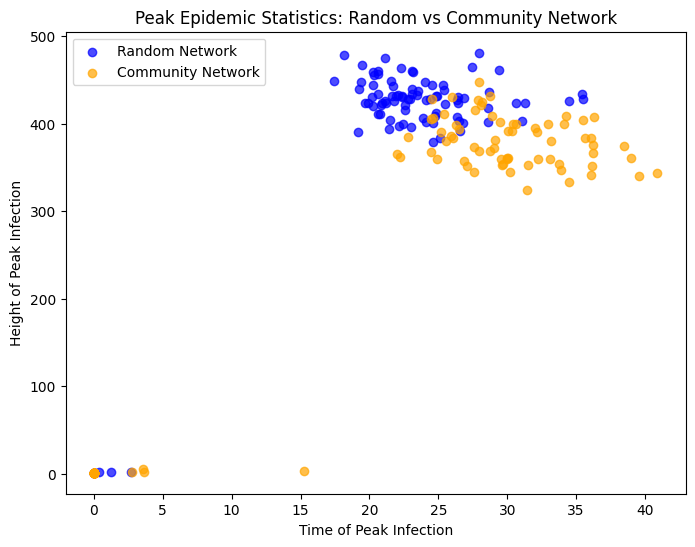

In [18]:
# Unpack peak times and heights
random_peak_times, random_peak_heights = zip(*random_peaks)
community_peak_times, community_peak_heights = zip(*community_peaks)

plt.figure(figsize=(8, 6))
plt.scatter(random_peak_times, random_peak_heights, alpha=0.7, label='Random Network', color='blue')
plt.scatter(community_peak_times, community_peak_heights, alpha=0.7, label='Community Network', color='orange')
plt.xlabel('Time of Peak Infection')
plt.ylabel('Height of Peak Infection')
plt.title('Peak Epidemic Statistics: Random vs Community Network')
plt.legend()
plt.show()

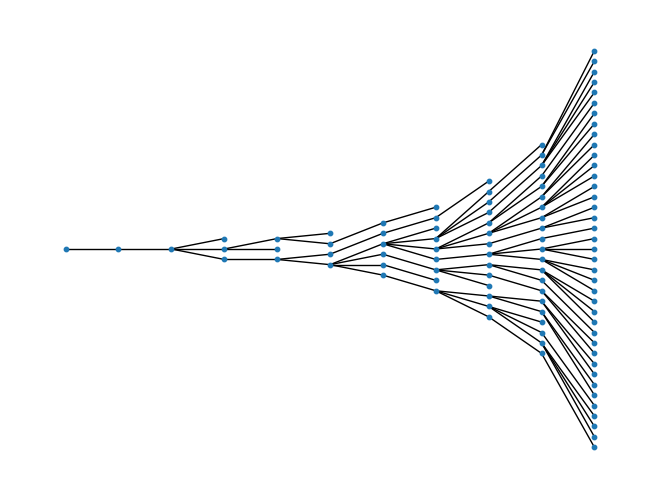

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)

def simulate_galton_watson(num_generations, offspring_distribution):
  # Create an empty graph
  G = nx.Graph()

  # Add the ancestor node
  G.add_node(0)

  # Initialize the current generation
  current_generation = [0]

  # Simulate the branching process for each generation
  for generation in range(1, num_generations + 1):
    next_generation = []

    # Generate offspring for each individual in the current generation
    for parent in current_generation:
      num_offspring = offspring_distribution()
      offspring_nodes = range(len(G), len(G) + num_offspring)

      # Add edges between the parent and offspring nodes
      G.add_edges_from([(parent, offspring) for offspring in offspring_nodes])

      # Add the offspring nodes to the next generation
      next_generation.extend(offspring_nodes)

    # Update the current generation
    current_generation = next_generation

  # Visualize the tree using bfs_layout
  pos = nx.bfs_layout(G,0)
  nx.draw(G, pos, node_size=10)
  plt.show()

# Example usage
num_generations = 10

offspring_distribution = lambda: np.random.poisson(1.5)

simulate_galton_watson(num_generations, offspring_distribution)

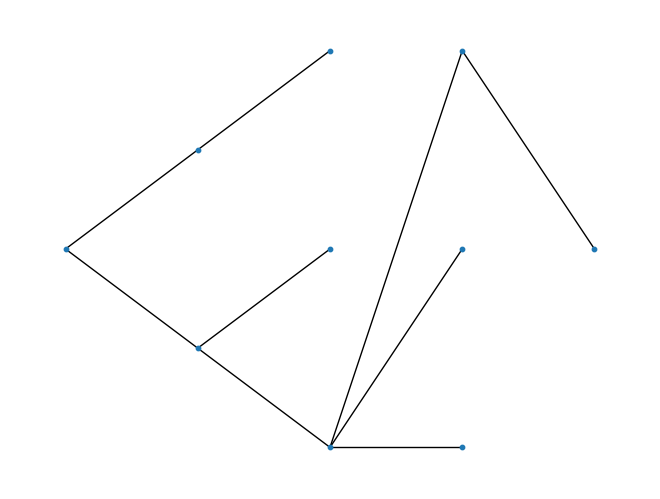

In [2]:
offspring_distribution = lambda: np.random.poisson(0.8)
simulate_galton_watson(num_generations, offspring_distribution)

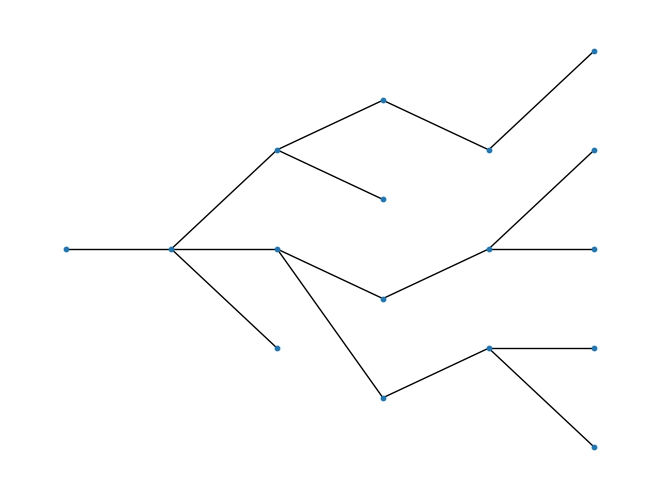

In [4]:
offspring_distribution = lambda: np.random.poisson(1.0)
simulate_galton_watson(num_generations, offspring_distribution)

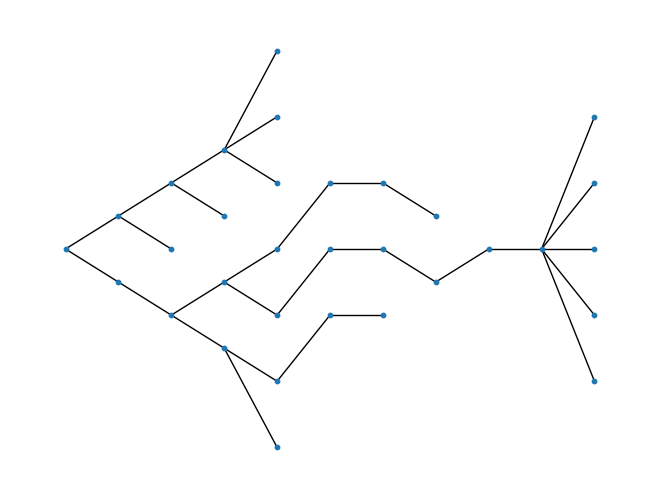

In [5]:
offspring_distribution = lambda: np.random.poisson(1.2)
simulate_galton_watson(num_generations, offspring_distribution)

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Define the degree sequence
degree_sequence = np.tile([3, 2, 1], 100)

# Generate the configuration model graph
G = nx.configuration_model(degree_sequence)

# Calculate IE d_I
IE_d_I = np.mean(degree_sequence)

# Calculate IE d_I(d_I-1)
IE_d_I_squared_minus_d_I = np.mean([d*(d-1) for d in degree_sequence])

# Calculate the ratio
ratio = IE_d_I_squared_minus_d_I / IE_d_I

print(f"The ratio IE d_I(d_I-1) / IE d_I is: {ratio}")

# Calculate the size of the largest component
largest_component = max(len(component) for component in nx.connected_components(G))
print(f"The size of the largest component is: {largest_component}")

The ratio IE d_I(d_I-1) / IE d_I is: 1.3333333333333333
The size of the largest component is: 239


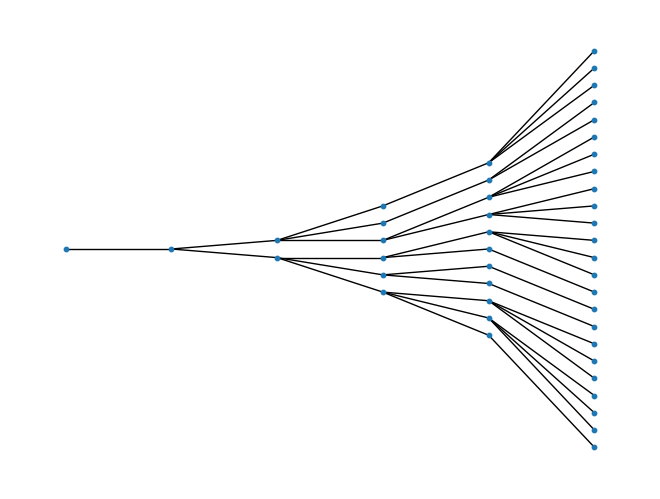

In [9]:
np.random.seed(1234)
num_generations = 5

offspring_distribution = lambda: np.random.choice([3, 2, 1])

simulate_galton_watson(num_generations, offspring_distribution)

Number of nodes: 25
Number of edges: 181


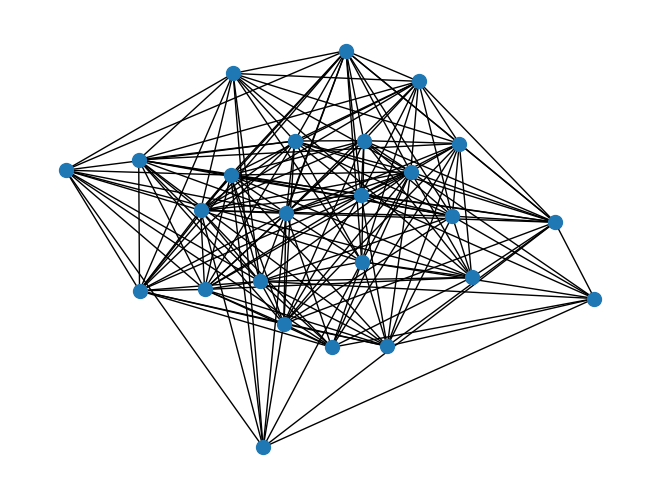

In [10]:
G = nx.read_graphml("C:\\Users\\YuxinLi\\Downloads\\primate_griffin_13.graphml")

print(f"Number of nodes: {len(G.nodes)}")
print(f"Number of edges: {len(G.edges)}")

pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=100)
plt.show()

In [11]:
# Calculate the transitivity of the graph G
transitivity = nx.transitivity(G)
print(f"The transitivity of the graph is: {transitivity}")

The transitivity of the graph is: 0.6252983293556086


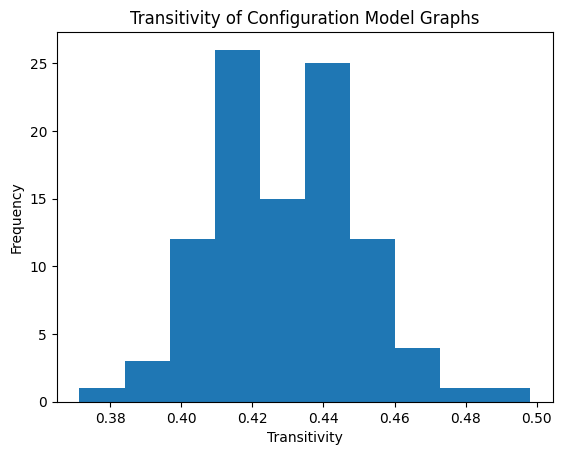

In [12]:
# Generate a hundred configuration model graphs with the same degree sequence as G
config_model_transitivity = []
for _ in range(100):
  config_model_graph = nx.configuration_model(list(dict(G.degree()).values()))
  config_model_transitivity.append(nx.transitivity(nx.Graph(config_model_graph)))

# Plot the histogram of the transitivity values
plt.hist(config_model_transitivity, bins=10)
plt.xlabel("Transitivity")
plt.ylabel("Frequency")
plt.title("Transitivity of Configuration Model Graphs")
plt.show()

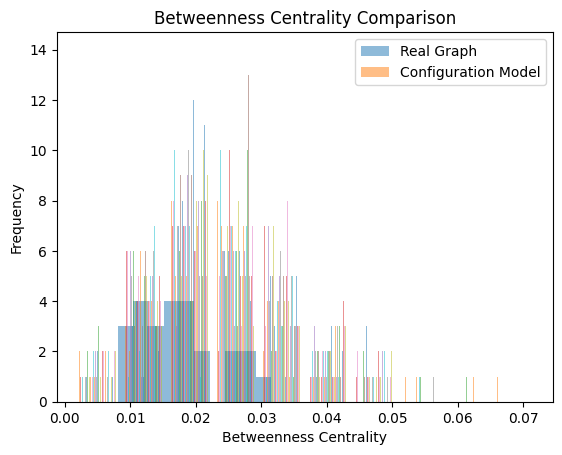

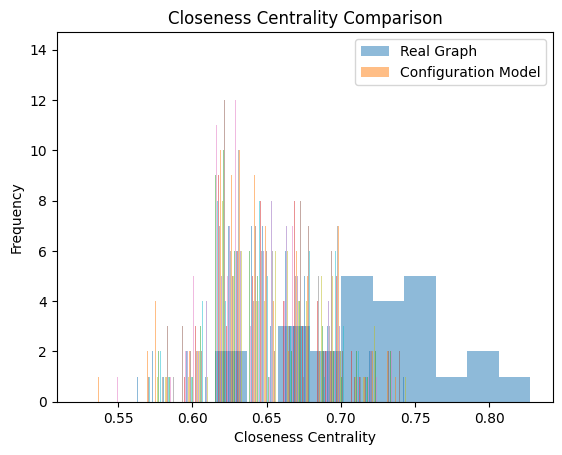

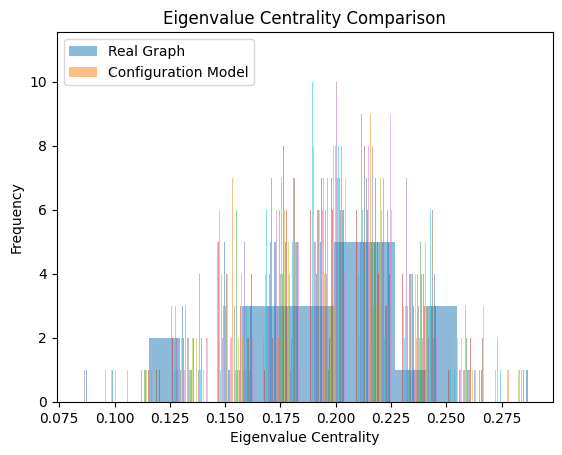

In [13]:
# Calculate the centrality measures for the graph G
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvalue_centrality = nx.eigenvector_centrality(G)

# Initialize lists to store the centrality values for the configuration model graphs
config_model_betweenness = []
config_model_closeness = []
config_model_eigenvalue = []

# Generate a hundred configuration model graphs with the same degree sequence as G
for _ in range(100):
  config_model_graph = nx.Graph(nx.configuration_model(list(dict(G.degree()).values())))
  config_model_betweenness.append(nx.betweenness_centrality(config_model_graph))
  config_model_closeness.append(nx.closeness_centrality(config_model_graph))
  config_model_eigenvalue.append(nx.eigenvector_centrality(config_model_graph))

# Plot the histograms of the centrality values for each measure
plt.hist(list(betweenness_centrality.values()), bins=10, alpha=0.5, label='Real Graph')
plt.hist([list(bc.values()) for bc in config_model_betweenness], bins=10, alpha=0.5, label='Configuration Model')
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.title("Betweenness Centrality Comparison")
plt.legend()
plt.show()

plt.hist(list(closeness_centrality.values()), bins=10, alpha=0.5, label='Real Graph')
plt.hist([list(cc.values()) for cc in config_model_closeness], bins=10, alpha=0.5, label='Configuration Model')
plt.xlabel("Closeness Centrality")
plt.ylabel("Frequency")
plt.title("Closeness Centrality Comparison")
plt.legend()
plt.show()

plt.hist(list(eigenvalue_centrality.values()), bins=10, alpha=0.5, label='Real Graph')
plt.hist([list(ec.values()) for ec in config_model_eigenvalue], bins=10, alpha=0.5, label='Configuration Model')
plt.xlabel("Eigenvalue Centrality")
plt.ylabel("Frequency")
plt.title("Eigenvalue Centrality Comparison")
plt.legend()
plt.show()

For n=125 and p=0.016, the average size of the second largest component is 4.4
For n=250 and p=0.008, the average size of the second largest component is 5.1
For n=500 and p=0.004, the average size of the second largest component is 4.7
For n=1000 and p=0.002, the average size of the second largest component is 6.1
For n=2000 and p=0.001, the average size of the second largest component is 7.0


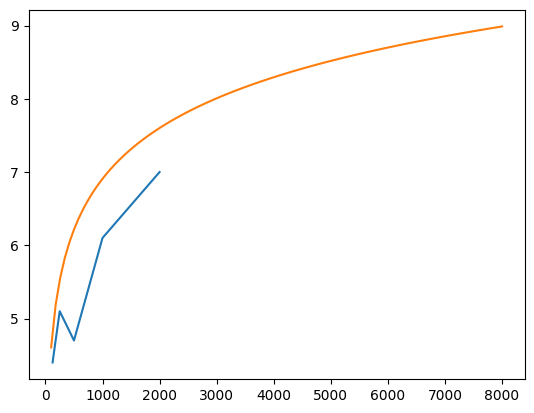

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def simulate_second_largest_component_size(n, p):
  sizes = []
  for _ in range(10):  # Repeat the simulation multiple times
    G = nx.erdos_renyi_graph(n, p)
    components = sorted(nx.connected_components(G),key=len, reverse=True)
    if len(components) > 1:
      sizes.append(len(components[1]))
    else:
      sizes.append(0)
  return sizes

n_values = [125, 250, 500, 1000, 2000]
p_values = [2/n for n in n_values]

avg_sizes = []

for i in range(len(n_values)):
  n = n_values[i]
  p = p_values[i]
  sizes = simulate_second_largest_component_size(n, p)
  avg_sizes.append(sum(sizes)/len(sizes))
  print(f"For n={n} and p={p}, the average size of the second largest component is {avg_sizes[i]}")

plt.plot(n_values, avg_sizes)
x = np.linspace(100, 8000, 100)
y = np.log(x)
plt.plot(x, y)
plt.show()

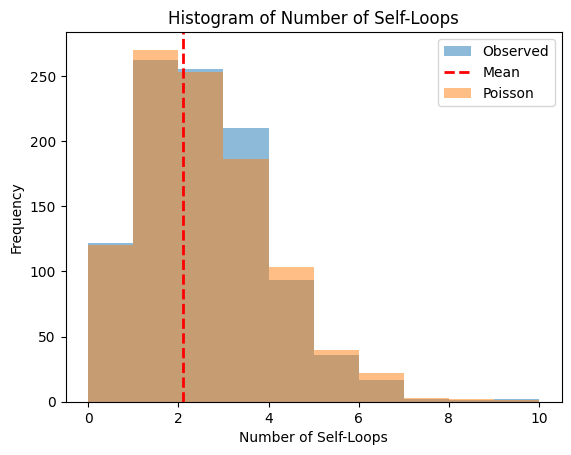

In [15]:
import networkx as nx
import numpy as np

def simulate_self_loops(degree_sequence):
  G = nx.configuration_model(degree_sequence)
  self_loops = [1 for u, v, i in G.edges if u == v]
  return len(self_loops)

while True:
  degree_sequence = np.random.randint(2, 8, size=100)  # Bounded degree sequence
  if sum(degree_sequence) % 2 == 0:
    break

num_self_loops = []

for i in range(1000):
  num_self_loops.append(simulate_self_loops(degree_sequence))

plt.hist(num_self_loops, bins=range(max(num_self_loops)+2), alpha=0.5, label='Observed')
plt.xlabel('Number of Self-Loops')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Self-Loops')
plt.axvline(np.mean(num_self_loops), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()

# Add Poisson distribution
poisson_values = np.random.poisson(np.mean(num_self_loops), len(num_self_loops))
plt.hist(poisson_values, bins=range(max(num_self_loops)+2), alpha=0.5, label='Poisson')
plt.legend()

plt.show()

In [16]:
# Sample an Erdős-Rényi random graph (ERRG) with n=100, p=0.02
n = 100
p = 0.02
G_errg = nx.erdos_renyi_graph(n, p)

# Calculate clustering coefficient for ERRG
errg_clustering = nx.transitivity(G_errg)

# Get the degree sequence from ERRG
degree_sequence = [d for _, d in G_errg.degree()]

# Construct a configuration model graph using the degree sequence
G_config = nx.configuration_model(degree_sequence)
G_config_simple = nx.Graph(G_config)  # Remove parallel edges
G_config_simple.remove_edges_from(nx.selfloop_edges(G_config_simple))  # Remove self-loops

# Calculate clustering coefficient for configuration model
config_clustering = nx.transitivity(G_config_simple)

# Print and compare
print(f"Clustering coefficient (ERRG): {errg_clustering:.4f}")
print(f"Clustering coefficient (Configuration Model): {config_clustering:.4f}")

Clustering coefficient (ERRG): 0.0290
Clustering coefficient (Configuration Model): 0.0435


Mean transitivity (ERRG): 0.0188
Mean transitivity (Configuration Model): 0.0197


C:\Users\YuxinLi\AppData\Local\Temp\ipykernel_21704\928923894.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([errg_transitivities, config_transitivities], labels=['ERRG', 'Configuration Model'])


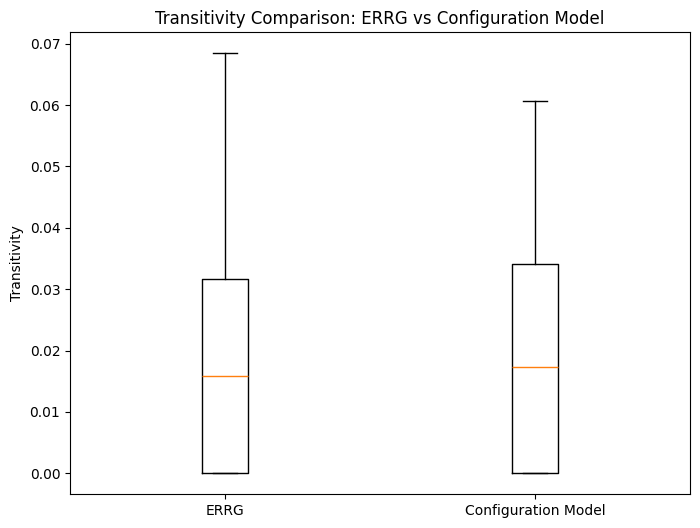

In [17]:
n = 100
p = 0.02
n_sim = 100

errg_transitivities = []
config_transitivities = []

for _ in range(n_sim):
    # Sample an ERRG
    G_errg = nx.erdos_renyi_graph(n, p)
    errg_transitivities.append(nx.transitivity(G_errg))
    
    # Get degree sequence and construct configuration model
    degree_sequence = [d for _, d in G_errg.degree()]
    G_config = nx.configuration_model(degree_sequence)
    G_config_simple = nx.Graph(G_config)
    G_config_simple.remove_edges_from(nx.selfloop_edges(G_config_simple))
    config_transitivities.append(nx.transitivity(G_config_simple))

# Compare mean transitivity
print(f"Mean transitivity (ERRG): {np.mean(errg_transitivities):.4f}")
print(f"Mean transitivity (Configuration Model): {np.mean(config_transitivities):.4f}")

# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([errg_transitivities, config_transitivities], labels=['ERRG', 'Configuration Model'])
plt.ylabel('Transitivity')
plt.title('Transitivity Comparison: ERRG vs Configuration Model')
plt.show()